# Libraries

In [104]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
import pickle

# Data Preprocessing

In [19]:
# Load the dataset
with open('english_words_479k.txt', 'r') as f:
    words = f.read().splitlines()
df = pd.DataFrame(words, columns=['word'])

In [20]:
df.head()

,word
0,2
1,1080
2,&c
3,10-point
4,10th


In [21]:
df['word'] = df['word'].apply(lambda x: ''.join(e for e in x if e.isalpha()).lower())

In [22]:
x='c'
for e in x:
    if e.isalpha():
        print(e.isalpha())

True


In [23]:
df.head()

,word
0,
1,
2,c
3,point
4,th


In [24]:
df.count()

word    466544
dtype: int64

In [35]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [36]:
df.head()

,word
0,sprezzatura
1,overliterariness
2,nobiliary
3,androdioecism
4,barbarize


In [39]:
vectorizer = CountVectorizer(analyzer='char')
X = vectorizer.fit_transform(df['word'])

In [53]:
a='atysg'
for i in vectorizer.transform([a]):
    print(i)

  (0, 0)	1
  (0, 6)	1
  (0, 18)	1
  (0, 19)	1
  (0, 24)	1


In [54]:
# Create target variable
y = []
for word in df['word']:
    if len(set(word)) == 1:
        y.append(0)
    else:
        y.append(1)

# Data Visualization

In [79]:
arr = X.toarray()
df_arr = pd.DataFrame(arr, columns=vectorizer.get_feature_names())
df_arr = df_arr.iloc[:10]

C:\Users\Sami\anaconda3\envs\dispaster\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:>

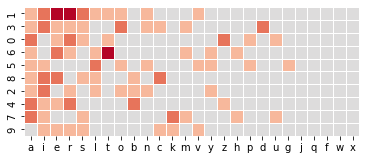

In [83]:
df_arr = df_arr[df_arr.sum().sort_values(ascending=False).index]
df_arr = df_arr.loc[df_arr.sum(axis=1).sort_values(ascending=False).index]
sns.heatmap(df_arr, cmap='coolwarm', center=0, square=True, linewidths=.5, cbar=False)

<AxesSubplot:>

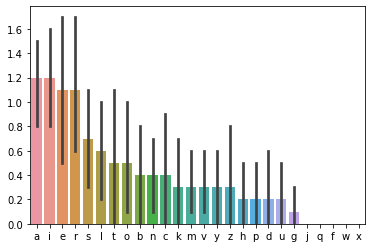

In [85]:
sns.barplot(df_arr)

# Train Test Split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Model

In [92]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# Evaluation

In [93]:
y_pred =model.predict(X_test)

In [91]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print(report)

Accuracy: 0.999657053446077
              precision    recall  f1-score   support

           0       1.00      0.09      0.16        35
           1       1.00      1.00      1.00     93274

    accuracy                           1.00     93309
   macro avg       1.00      0.54      0.58     93309
weighted avg       1.00      1.00      1.00     93309



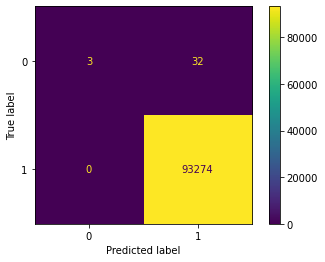

In [95]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [103]:
word_to_check = ["Hello..",'12','@..','samk']
test = vectorizer.transform(np.array(word_to_check))
prediction = model.predict(test)
for i in range(len(prediction)):
    if prediction[i] == 1:
        print(word_to_check[i], "is an English word.")
    else:
        print(word_to_check[i], "is not an English word.")

<IPython.core.display.Javascript object>

Hello.. is an English word.
12 is not an English word.
@.. is not an English word.
samk is an English word.


# Save Model

In [105]:
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [106]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
